# Benchmarking Experiments for Extended KPrototypes

In [1]:
import os
import sys
current_dir = os.getcwd()

# Get the absolute path of the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
sys.path.append(parent_dir)

from random import randint
from typing import Any

import pandas as pd

from benchmark_extension import Experiment

In [2]:
sample_difficulty_configurations = {
     'easy': {
             'n_samples': 2000,
             'n_clusters': 3,
             # Features
             'n_numeric_features': 5,
             'n_categorical_features': 5,
             'categorical_cardinalities': [6, 6, 6, 6, 6],
             'n_multival_features': 5,
             'multival_vocab_lens': [(3, 3, 3),  # How many vocab items
                                     (3, 3, 3),  # are associated to a
                                     (3, 3, 3),  # cluster.
                                     (3, 3, 3),
                                     (3, 3, 3)],
             # Difficulty params
             'separability': 3.0,
             'multival_intersections': 1,
             'noise': 0.01,
             'class_weights': [0.33, 0.33],
             # Approach Settings
             'approach_settings': {
                'naive': {
                    'gamma': None
                },
                'one-hot': {
                    'gamma': None,
                    'max_dummies': 100
                },
                'one-hot-pca': {
                    'gamma': None,
                    'reduced_dimensions': 0.25
                },
                'extended': {
                    'gamma_c': 0.33,
                    'gamma_m': 0.33,
                    'theta': 0.001
                }
               },
              },
     'medium': None,
     'hard': None
}

In [3]:
exp = Experiment(benchmarking_config=sample_difficulty_configurations['easy'],
                 approaches=('naive', 'one-hot', 'one-hot-pca', 'extended'),
                 random_state=42)

In [4]:
single_result = exp.run_experiment()

In [5]:
single_result['naive']

{'preprocess_time': 0.009260700084269047,
 'clustering_time': 4.436648300033994,
 'sum_of_times': 4.445909000118263,
 'n_iter': 2,
 'MIS': 0.9698692316348873,
 'ARI': 0.9850825134727914,
 'Silhoutte Index': 0.4728563265184326,
 'centroids': array([['-3.02685837513088', '-3.060411520334348', '2.9566655341127697',
         '2.9991287007613856', '-3.016087121799718', '5', '4', '5', '4',
         '5', '{6, 7, 8, 10, 11}', '{6, 7, 8, 10, 11}',
         '{6, 7, 8, 10, 11}', '{6, 7, 8, 10, 11}', '{6, 7, 8, 10, 11}'],
        ['2.9457840200839347', '3.0208802544753506', '2.9393406917607727',
         '-2.932237858513235', '2.9183526188934112', '3', '2', '2', '2',
         '3', '{3, 4, 5, 9, 11}', '{3, 4, 5, 9, 11}', '{3, 4, 5, 9, 11}',
         '{3, 4, 5, 9, 11}', '{3, 4, 5, 9, 11}'],
        ['3.0162932828337894', '-2.965921465036472', '2.9648799685851572',
         '2.9845101246319605', '2.971865234885406', '0', '1', '0', '0',
         '0', '{0, 1, 2, 9, 10}', '{0, 1, 2, 9, 10}', '{0, 1, 2, 

In [6]:
single_result['one-hot']

{'preprocess_time': 0.824871200020425,
 'clustering_time': 7.41347929998301,
 'sum_of_times': 8.238350500003435,
 'n_iter': 2,
 'MIS': 0.9792480118880699,
 'ARI': 0.9895642142025028,
 'Silhoutte Index': 0.5742200797638486,
 'centroids': array([[ 3.01375172e+00, -2.95615795e+00,  2.96331270e+00,
          2.97647566e+00,  2.97115367e+00,  5.05295008e-01,
          5.23449319e-01,  4.99243570e-01,  4.78063540e-01,
          4.97730711e-01,  9.93948563e-01,  9.93948563e-01,
          9.93948563e-01,  6.05143722e-03,  6.05143722e-03,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  

In [7]:
single_result['one-hot-pca']

{'preprocess_time': 0.938326200004667,
 'clustering_time': 3.590787199907936,
 'sum_of_times': 4.529113399912603,
 'n_iter': 2,
 'MIS': 0.9724181956910335,
 'ARI': 0.9865824602432615,
 'Silhoutte Index': 0.6420686103285879,
 'centroids': array([[-3.02475416e+00, -3.05350012e+00,  2.95928398e+00,
          2.99580409e+00, -3.00977783e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.47275405e-03,
          1.47275405e-03,  3.49060315e+00, -5.14570414e-01,
         -6.52642410e-17, -1.68834831e-17, -3.25345687e-30,
          4.24042258e-30, -3.43164990e-32,  4.01839100e-33,
          8.51760017e-34, -8.70534224e-45, -2.36892119e-45,
         -1.53032641e-46, -5.00710093e-47, -8.33680726e-50,
          5.00000000e+00,  4.00000000e+00,  5.00000000e+00,
          4.00000000e+00,  5.00000000e+00],
        [ 3.01629328e+00, -2.96592147e+00,  2.96487997e+00,
          2.98451012e+00,  2.97186523e+00,  9.92435703e-01,
          9.92435703e-01,  9.92435703e-01,  6.05143722e-03,

In [8]:
single_result['extended']

{'preprocess_time': 0.00012750003952533007,
 'clustering_time': 13.170104200020432,
 'sum_of_times': 13.170231700059958,
 'n_iter': 3,
 'MIS': 0.9698692316348873,
 'ARI': 0.9850825134727914,
 'Silhoutte Index': 0.6820667965147432,
 'centroids': array([[3.0162932828337907, -2.9659214650364714, 2.964879968585157,
         2.9845101246319605, 2.9718652348854064, 0, 1, 0, 0, 0,
         {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10},
         {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}],
        [-3.0268583751308826, -3.0604115203343354, 2.95666553411276,
         2.999128700761384, -3.0160871217997176, 5, 4, 5, 4, 5,
         {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11},
         {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}],
        [2.9457840200839334, 3.020880254475352, 2.9393406917607776,
         -2.932237858513238, 2.9183526188934117, 3, 2, 2, 2, 3,
         {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11},
         {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}]], dtype=object)}

Note that the centroid values for the multi-valued attributes perfectly reflect the centroids at the data generation step: 3 values for the argument vocab_lens and two extra arguments, one per intersection with another cluster.

## Experiment 1: Changing the values of Theta

Let us try $\theta \in \{0.001, 0.005, 0.01, 0.05\}$ for now.

In [9]:
# random_states = [randint(0, 100) for x in range(4)]

random_states = [34, 9, 7, 92]

In [57]:
exp = Experiment(benchmarking_config=sample_difficulty_configurations['easy'],
                 approaches=('extended',))

In [58]:
result_list = exp.experiment_across_values(
    base_config=sample_difficulty_configurations['easy'],
    random_states=random_states,
    approach_settings= [{'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.001}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.005}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.01}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.05}
                        }
                        ])

In [59]:
result_list[0]

{'extended': {'preprocess_time': 0.0001308999489992857,
  'clustering_time': 13.996221699984744,
  'sum_of_times': 13.996352599933743,
  'n_iter': 3,
  'MIS': 0.9022742464960722,
  'ARI': 0.9408890921287254,
  'centroids': array([[-3.0296844430147423, -2.986342763758682, 2.917696317335106,
          3.0168621941000104, 3.0191491641940704, 4, 4, 4, 4, 5,
          {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11},
          {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}],
         [3.0065910143126215, 2.9435042123424324, 3.1179467529071108,
          3.0104278831823588, 2.9391349732405985, 1, 1, 1, 0, 0,
          {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10},
          {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}],
         [2.998802202159401, -2.962544057748266, 3.0272171718269822,
          3.060815261060462, 2.931489218918325, 3, 2, 3, 3, 2,
          {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11},
          {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}]], dtype=object)}}

In [60]:
def organise_results_for_one_variable(
        result_list: list[dict[str, dict]],
        variable_vals: list,
        targets: list[str]):
    # Approaches as rows, targets as columns
    series_list = []

    for result in result_list:
        result_indexes = []
        result_outcomes = []

        for r_key in targets:
            for a_key, a_result in result.items():
                outcome = a_result[r_key]
                result_outcomes.append(outcome)
                result_indexes.append((r_key, a_key))
        
        index = pd.MultiIndex.from_tuples(result_indexes,
                                          names=['metric',
                                                 'approach'])
        series_list.append(pd.Series(result_outcomes, index))

    out_df = pd.concat(series_list, axis=1)
    out_df.columns = variable_vals

    return out_df

In [61]:
organise_results_for_one_variable(result_list=result_list,
                                  variable_vals=[0.001, 0.005, 0.01, 0.05],
                                  targets=['MIS', 'ARI']
                                  )

,,0.001,0.005,0.010,0.050
metric,approach,,,,
MIS,extended,0.902274,0.954131,0.958092,0.957945
ARI,extended,0.940889,0.976088,0.979085,0.977569


Interesting; both metrics grow in the levels above 0.001, and both plateau at the 0.01 level of the parameter. Let us run the experiment many times now:

In [62]:
approach_settings = [{'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.001}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.005}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.01}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.05}
                        }
                        ]

In [63]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(4)]
    
    exp = Experiment(
        benchmarking_config=sample_difficulty_configurations['easy'],
        approaches=('extended',),
        random_state=experiment_state)

    result_list = exp.experiment_across_values(
        base_config=sample_difficulty_configurations['easy'],
        random_states=random_states,
        approach_settings=approach_settings)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[0.001, 0.005, 0.01, 0.05],
        targets=['MIS', 'ARI']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

In [70]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

sum_of_values/iterations

,,0.001,0.005,0.010,0.050
metric,approach,,,,
MIS,extended,0.945743,0.952104,0.950758,0.925301
ARI,extended,0.969961,0.973742,0.972485,0.954777


It would seem that low and prudential values of theta offer the best performance in truth recovery. When we look to the clusters...

In [71]:
# See benchmark_results/theta_experiment_results_centroids.txt
exp_raw_results

[[{'extended': {'preprocess_time': 0.00017829996068030596,
    'clustering_time': 12.753157900064252,
    'sum_of_times': 12.753336200024933,
    'n_iter': 3,
    'MIS': 0.9709819668795838,
    'ARI': 0.9849985677305998,
    'centroids': array([[3.0447802373182706, -3.0069939281707305, -3.0195703818096025,
            -2.9968568704713765, -2.991774057213998, 2, 3, 2, 3, 3,
            {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11},
            {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}],
           [2.975741589834072, -3.0483469450337792, 3.0350426091287757,
            3.036022814937652, 3.0261778842771876, 5, 5, 5, 4, 4,
            {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11},
            {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}],
           [-2.9771624323423933, 3.0026196136253245, 2.975555887395916,
            -3.050055461089015, 2.978939601315464, 0, 0, 0, 0, 0,
            {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10},
            {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}]

...we see that the centroid values for multi-valued attributes are unchanging for the tested values of theta. This is understandable, since the clusters were generated with highly differentiated multi-valued attributes.

We can test higher vocabulary lengths and degrees of intersection to measure a stronger effect:

In [95]:
base_config = {
             'n_samples': 2000,
             'n_clusters': 3,
             # Features
             'n_numeric_features': 5,
             'n_categorical_features': 5,
             'categorical_cardinalities': [6, 6, 6, 6, 6],
             'n_multival_features': 5,
             'multival_vocab_lens': [(10, 10, 10),  # How many vocab items
                                     (10, 10, 10),  # are associated to a
                                     (10, 10, 10),  # cluster.
                                     (10, 10, 10),
                                     (10, 10, 10)],
             # Difficulty params
             'separability': 3.0,
             'multival_intersections': 5,
             'noise': 0.01,
             'class_weights': [0.33, 0.33],
             # Approach Settings
             'approach_settings': {
                'naive': {
                    'gamma': None
                },
                'one-hot': {
                    'gamma': None,
                    'max_dummies': 100
                },
                'one-hot-pca': {
                    'gamma': None,
                    'reduced_dimensions': 0.25
                },
                'extended': {
                    'gamma_c': 0.33,
                    'gamma_m': 0.33,
                    'theta': 0.001
                }
               }
              }

In [96]:
approach_settings = [{'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.001}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.005}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.01}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.05}
                        }
                        ]

In [97]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(4)]
    
    exp = Experiment(
        benchmarking_config=base_config,
        approaches=('extended',),
        random_state=experiment_state)

    result_list = exp.experiment_across_values(
        base_config=base_config,
        random_states=random_states,
        approach_settings=approach_settings)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[0.001, 0.005, 0.01, 0.05],
        targets=['MIS', 'ARI']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

In [98]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

sum_of_values/iterations

,,0.001,0.005,0.010,0.050
metric,approach,,,,
MIS,extended,0.941083,0.946023,0.954386,0.948686
ARI,extended,0.966999,0.969985,0.976446,0.972271


Similar results. Let us add higher values of theta as well:

In [99]:
approach_settings = [{'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.001}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.005}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.01}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.05}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.1}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.25}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.5}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.7}
                        },
                        {'naive': {'gamma': None},
                        'one-hot': {'gamma': None, 'max_dummies': 100},
                        'one-hot-pca': {'gamma': None,
                                        'reduced_dimensions': 0.25},
                        'extended': {'gamma_c': 0.33, 'gamma_m': 0.33,
                                     'theta': 0.9}
                        }
                        ]

In [100]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(9)]
    
    exp = Experiment(
        benchmarking_config=base_config,
        approaches=('extended',),
        random_state=experiment_state)

    result_list = exp.experiment_across_values(
        base_config=base_config,
        random_states=random_states,
        approach_settings=approach_settings)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[0.001, 0.005, 0.01, 0.05, 0.1, 0.25, 0.5, 0.7, 0.9],
        targets=['MIS', 'ARI']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

In [103]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

sum_of_values/iterations

,,0.001,0.005,0.010,0.050,0.100,0.250,0.500,0.700,0.900
metric,approach,,,,,,,,,
MIS,extended,0.958383,0.943064,0.965756,0.962285,0.939449,0.93779,0.945055,0.956612,0.953027
ARI,extended,0.977662,0.969106,0.982411,0.980611,0.966976,0.96153,0.969934,0.977914,0.974126


In [107]:
(sum_of_values/iterations).round(3).to_clipboard()

In [84]:
exp_raw_results

[[{'extended': {'preprocess_time': 0.000112400040961802,
    'clustering_time': 13.29801819997374,
    'sum_of_times': 13.298130600014701,
    'n_iter': 4,
    'MIS': 0.9536371199653346,
    'ARI': 0.9761404319107873,
    'centroids': array([[-3.117597659721187, 3.061273714440856, 3.117611073803519,
            2.9447247440878357, 2.894470235247624, 3, 3, 2, 3, 2,
            {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11},
            {3, 4, 5, 9, 11}, {3, 4, 5, 9, 11}],
           [-2.922690732443881, 3.004825316922242, -2.9859891617296657,
            2.9584974131314072, 3.0453544136659016, 4, 5, 5, 4, 5,
            {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11},
            {6, 7, 8, 10, 11}, {6, 7, 8, 10, 11}],
           [2.9777953894908515, -2.938556598419878, 3.0111099446101917,
            -3.065100896326692, -2.9388027603175226, 1, 0, 0, 1, 0,
            {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10},
            {0, 1, 2, 9, 10}, {0, 1, 2, 9, 10}]], dty

We observe that with a growing theta, the centroid sets tend to become emptier, increasing the distances. However, since the numeric and categorical attributes contain enough separability between them, the clustering result is not substantially affected.

## Experiment 2: Variations on the Values of the Gammas

In [26]:
from itertools import permutations

In [27]:
base_config = {
             'n_samples': 1000,
             'n_clusters': 3,
             # Features
             'n_numeric_features': 5,
             'n_categorical_features': 5,
             'categorical_cardinalities': [6, 6, 6, 6, 6],
             'n_multival_features': 5,
             'multival_vocab_lens': [(3, 3, 3),  # How many vocab items
                                     (3, 3, 3),  # are associated to a
                                     (3, 3, 3),  # cluster.
                                     (3, 3, 3),
                                     (3, 3, 3)],
             # Difficulty params
             'separability': 3.0,
             'multival_intersections': 1,
             'noise': 0.01,
             'class_weights': [0.33, 0.33],
             # Approach Settings
             'approach_settings': {
                'naive': {
                    'gamma': None
                },
                'one-hot': {
                    'gamma': None,
                    'max_dummies': 100
                },
                'one-hot-pca': {
                    'gamma': None,
                    'reduced_dimensions': 0.25
                },
                'extended': {
                    'gamma_c': 0.33,
                    'gamma_m': 0.33,
                    'theta': 0.001
                }
               },
              }

In [28]:
def organise_results_for_one_variable(
        result_list: list[dict[str, dict]],
        variable_vals: list,
        targets: list[str]):
    # Approaches as rows, targets as columns
    series_list = []

    for result in result_list:
        result_indexes = []
        result_outcomes = []

        for r_key in targets:
            for a_key, a_result in result.items():
                outcome = a_result[r_key]
                result_outcomes.append(outcome)
                result_indexes.append((r_key, a_key))
        
        index = pd.MultiIndex.from_tuples(result_indexes,
                                          names=['metric',
                                                 'approach'])
        series_list.append(pd.Series(result_outcomes, index))

    out_df = pd.concat(series_list, axis=1)
    out_df.columns = variable_vals

    return out_df

In [29]:
base_setting = {'naive': {'gamma': None},
                'one-hot': {'gamma': None, 'max_dummies': 100},
                'one-hot-pca': {'gamma': None,
                                'reduced_dimensions': 0.25},
                'extended': {'gamma_c': 0.1, 'gamma_m': 0.1,
                             'theta': 0.005}
                        }

In [64]:
import copy

def grid_test_across_gammas(gamma_list: list, base_approach_setting: dict):
    out_settings = []
    out_combs = []
    gamma_combinations = permutations(gamma_list, 2)
    setting = base_approach_setting.copy()

    for comb in gamma_combinations:
        if comb[0]+comb[1] >= 1.0:
            continue
        setting['extended']['gamma_c'] = comb[0]
        setting['extended']['gamma_m'] = comb[1]
        out_settings.append(copy.deepcopy(setting))
        out_combs.append(comb)

    return out_settings, out_combs

In [65]:
setting_list, setting_combinations = grid_test_across_gammas(gamma_list=[0.1, 0.2, 0.3, 0.4, 0.5,
                                                   0.6, 0.7, 0.8, 0.9, 1.],
                                       base_approach_setting=base_setting)

setting_list[:2]

[{'naive': {'gamma': None},
  'one-hot': {'gamma': None, 'max_dummies': 100},
  'one-hot-pca': {'gamma': None, 'reduced_dimensions': 0.25},
  'extended': {'gamma_c': 0.1, 'gamma_m': 0.2, 'theta': 0.005}},
 {'naive': {'gamma': None},
  'one-hot': {'gamma': None, 'max_dummies': 100},
  'one-hot-pca': {'gamma': None, 'reduced_dimensions': 0.25},
  'extended': {'gamma_c': 0.1, 'gamma_m': 0.3, 'theta': 0.005}}]

In [67]:
iterations = 5

exp_raw_results = []
exp_processed_results = []

for n_iter in range(iterations):
    experiment_state = randint(0, 1000)
    random_states = [randint(0, 1000) for _ in range(len(setting_combinations))]
    
    exp = Experiment(
        benchmarking_config=base_config,
        approaches=('extended',),
        random_state=experiment_state)

    result_list = exp.experiment_across_values(
        base_config=base_config,
        random_states=random_states,
        approach_settings=setting_list)
    
    exp_results = organise_results_for_one_variable(
        result_list=result_list,
        variable_vals=[str(comb) for comb in setting_combinations],
        targets=['MIS', 'ARI', 'Silhouette Index']
        )
    
    exp_raw_results.append(result_list)
    exp_processed_results.append(exp_results)

In [68]:
sum_of_values = exp_processed_results[0].values

for i in range(1, iterations):
    sum_of_values = sum_of_values + exp_processed_results[i]

sum_of_values/iterations

,,"(0.1, 0.2)","(0.1, 0.3)","(0.1, 0.4)","(0.1, 0.5)","(0.1, 0.6)","(0.1, 0.7)","(0.1, 0.8)","(0.2, 0.1)","(0.2, 0.3)","(0.2, 0.4)",...,"(0.5, 0.1)","(0.5, 0.2)","(0.5, 0.3)","(0.5, 0.4)","(0.6, 0.1)","(0.6, 0.2)","(0.6, 0.3)","(0.7, 0.1)","(0.7, 0.2)","(0.8, 0.1)"
metric,approach,,,,,,,,,,,,,,,,,,,,,
MIS,extended,0.954532,0.943444,0.937032,0.957549,0.948524,0.965813,0.966718,0.921879,0.958708,0.962823,...,0.926800,0.960439,0.959556,0.961677,0.961663,0.955977,0.961087,0.953270,0.962515,0.970831
ARI,extended,0.976104,0.967292,0.961838,0.976743,0.971930,0.982029,0.982665,0.952115,0.977875,0.979669,...,0.953037,0.979091,0.978529,0.979671,0.979130,0.976123,0.979134,0.974351,0.980289,0.985052
Silhouette Index,extended,0.627202,0.657625,0.696895,0.730355,0.768500,0.820467,0.891116,0.521032,0.673877,0.686153,...,0.482420,0.595522,0.690930,0.753221,0.539039,0.602363,0.666042,0.485947,0.598068,0.428953


In [69]:
import pickle as pkl

with open('experiment_2_results.pkl', 'wb') as file:
    pkl.dump(obj=sum_of_values/iterations, file=file)

In [70]:
import pickle as pkl

with open('experiment_2_results.pkl', 'rb') as file:
    res = pkl.load(file)

In [71]:
res

,,"(0.1, 0.2)","(0.1, 0.3)","(0.1, 0.4)","(0.1, 0.5)","(0.1, 0.6)","(0.1, 0.7)","(0.1, 0.8)","(0.2, 0.1)","(0.2, 0.3)","(0.2, 0.4)",...,"(0.5, 0.1)","(0.5, 0.2)","(0.5, 0.3)","(0.5, 0.4)","(0.6, 0.1)","(0.6, 0.2)","(0.6, 0.3)","(0.7, 0.1)","(0.7, 0.2)","(0.8, 0.1)"
metric,approach,,,,,,,,,,,,,,,,,,,,,
MIS,extended,0.954532,0.943444,0.937032,0.957549,0.948524,0.965813,0.966718,0.921879,0.958708,0.962823,...,0.926800,0.960439,0.959556,0.961677,0.961663,0.955977,0.961087,0.953270,0.962515,0.970831
ARI,extended,0.976104,0.967292,0.961838,0.976743,0.971930,0.982029,0.982665,0.952115,0.977875,0.979669,...,0.953037,0.979091,0.978529,0.979671,0.979130,0.976123,0.979134,0.974351,0.980289,0.985052
Silhouette Index,extended,0.627202,0.657625,0.696895,0.730355,0.768500,0.820467,0.891116,0.521032,0.673877,0.686153,...,0.482420,0.595522,0.690930,0.753221,0.539039,0.602363,0.666042,0.485947,0.598068,0.428953


In [72]:
res.T

metric,MIS,ARI,Silhouette Index
approach,extended,extended,extended
"(0.1, 0.2)",0.954532,0.976104,0.627202
"(0.1, 0.3)",0.943444,0.967292,0.657625
"(0.1, 0.4)",0.937032,0.961838,0.696895
"(0.1, 0.5)",0.957549,0.976743,0.730355
"(0.1, 0.6)",0.948524,0.971930,0.768500
"(0.1, 0.7)",0.965813,0.982029,0.820467
"(0.1, 0.8)",0.966718,0.982665,0.891116
"(0.2, 0.1)",0.921879,0.952115,0.521032
"(0.2, 0.3)",0.958708,0.977875,0.673877


In [73]:
heat_map_res = res.reset_index(drop=True).T

In [74]:
heat_map_res.columns = ['MIS', 'ARI', 'Silhouette Index']
heat_map_res.head()

,MIS,ARI,Silhouette Index
"(0.1, 0.2)",0.954532,0.976104,0.627202
"(0.1, 0.3)",0.943444,0.967292,0.657625
"(0.1, 0.4)",0.937032,0.961838,0.696895
"(0.1, 0.5)",0.957549,0.976743,0.730355
"(0.1, 0.6)",0.948524,0.971930,0.768500


In [75]:
from seaborn import heatmap

In [76]:
def interpret_string_tuple(string_tuple: str):
    out = string_tuple.replace('(', '').replace(')', '')
    out = [float(i) for i in out.split(', ')]
    return out

interpret_string_tuple('(0.1, 0.2)')

[0.1, 0.2]

In [82]:
heatmap_df = pd.concat([pd.DataFrame(heat_map_res.reset_index()['index'].apply(lambda x: interpret_string_tuple(x)).to_list(), columns=['gamma_c', 'gamma_m']), heat_map_res['MIS'].reset_index(drop=True)], axis=1)
heatmap_df.head()

,gamma_c,gamma_m,MIS
0,0.1,0.2,0.954532
1,0.1,0.3,0.943444
2,0.1,0.4,0.937032
3,0.1,0.5,0.957549
4,0.1,0.6,0.948524


<Axes: xlabel='gamma_m', ylabel='gamma_c'>

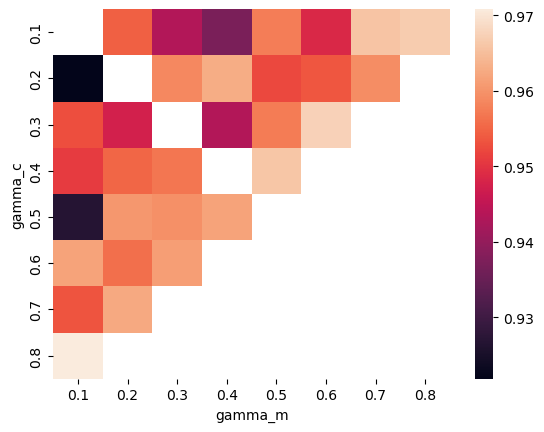

In [87]:
heatmap(heatmap_df.pivot(index='gamma_c', columns='gamma_m', values='MIS'))

<Axes: xlabel='gamma_m', ylabel='gamma_c'>

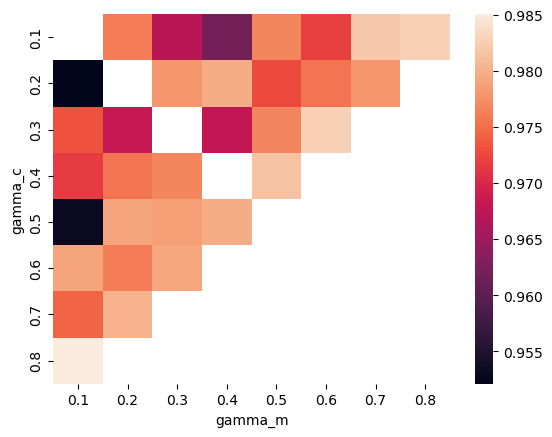

In [89]:
heatmap_df = pd.concat([pd.DataFrame(heat_map_res.reset_index()['index'].apply(lambda x: interpret_string_tuple(x)).to_list(), columns=['gamma_c', 'gamma_m']), heat_map_res['ARI'].reset_index(drop=True)], axis=1)
heatmap_df.head()
heatmap(heatmap_df.pivot(index='gamma_c', columns='gamma_m', values='ARI'))

<Axes: xlabel='gamma_m', ylabel='gamma_c'>

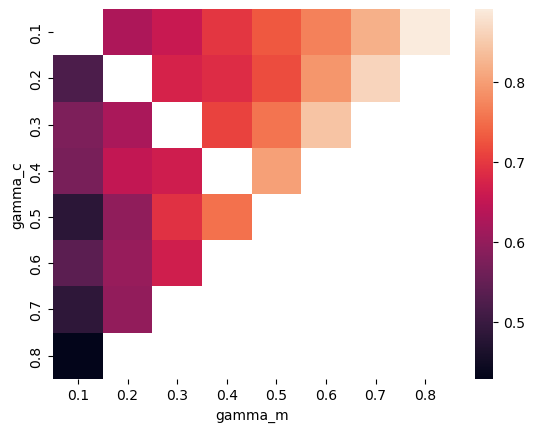

In [91]:
heatmap_df = pd.concat([pd.DataFrame(heat_map_res.reset_index()['index'].apply(lambda x: interpret_string_tuple(x)).to_list(), columns=['gamma_c', 'gamma_m']), heat_map_res['Silhouette Index'].reset_index(drop=True)], axis=1)
heatmap_df.head()
heatmap(heatmap_df.pivot(index='gamma_c', columns='gamma_m', values='Silhouette Index'))